Perform Facial Recognition with Deep Learning in Keras Using CNN

DESCRIPTION

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

i. Convolutional Layer
ii. Pooling Layer
iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import PIL.Image

In [251]:
trainX = np.load('./resources/ORL_faces/trainX.npy')
trainY = np.load('./resources/ORL_faces/trainY.npy')
testX = np.load('./resources/ORL_faces/testX.npy')
testY = np.load('./resources/ORL_faces/testY.npy')

In [252]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((240, 10304), (240,), (160, 10304), (160,))

In [253]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [254]:
trainX  = trainX.reshape(trainX.shape[0], 112, 92, 1)
testX   = testX.reshape(testX.shape[0], 112, 92, 1)

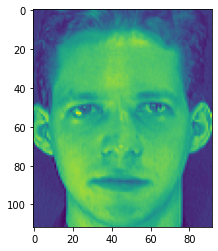

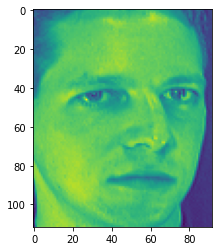

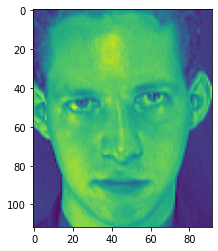

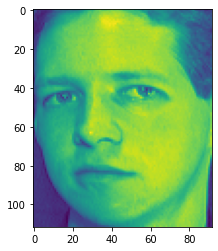

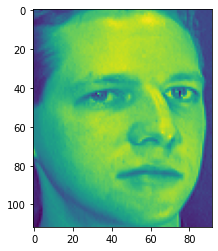

In [255]:
count = 1
for itr in trainX:
    if count > 5:
        break
    fig = plt.figure()
    plt.imshow(itr)
    count+=1

In [256]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [257]:
# create the model
model = Sequential()
model.add(tf.keras.layers.Reshape((112, 92, 1), input_shape=(112, 92, 1)))
model.add(tf.keras.layers.BatchNormalization())
# add cnn layers
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(112, 92, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

# add cnn layers
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(112, 92, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

# add cnn layers
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(112, 92, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
#output layers
model.add(Dense(20, activation='softmax'))

In [258]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 112, 92, 1)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 112, 92, 1)       4         
 hNormalization)                                                 
                                                                 
 conv2d_22 (Conv2D)          (None, 110, 90, 32)       320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 55, 45, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 55, 45, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 53, 43, 64)       

In [259]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [280]:
history = model.fit(x=trainX, y=trainY, validation_data=(testX,testY), epochs=30, batch_size=16)

Epoch 1/30
15/15 [==============================] - 2s 114ms/step - loss: 1.2942e-05 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9625
Epoch 2/30
15/15 [==============================] - 1s 99ms/step - loss: 1.5644e-05 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.9625
Epoch 3/30
15/15 [==============================] - 1s 100ms/step - loss: 4.0363e-05 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9625
Epoch 4/30
15/15 [==============================] - 2s 101ms/step - loss: 1.9610e-05 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 0.9625
Epoch 5/30
15/15 [==============================] - 2s 102ms/step - loss: 1.7627e-05 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9625
Epoch 6/30
15/15 [==============================] - 2s 103ms/step - loss: 8.4728e-06 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9625
Epoch 7/30
15/15 [==============================] - 2s 102ms/step - loss: 1.2259e-05 - accuracy: 1.0000 - val_loss: 0.0312 - 

In [270]:
score = model.evaluate(testX,testY)

5/5 [==============================] - 0s 37ms/step - loss: 0.0285 - accuracy: 0.9625


<AxesSubplot:>

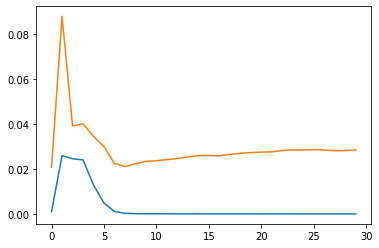

In [271]:
import seaborn as sns
plt.figure()
sns.lineplot(x=history.epoch,y=history.history['loss'])
sns.lineplot(x=history.epoch,y=history.history['val_loss'])

<AxesSubplot:>

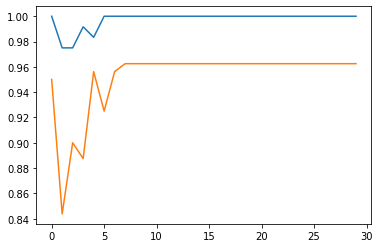

In [272]:
sns.lineplot(x=history.epoch,y=history.history['accuracy'])
sns.lineplot(x=history.epoch,y=history.history['val_accuracy'])

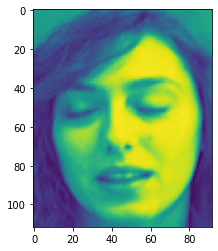

In [273]:
fig = plt.figure()
plt.imshow(testX[60])

In [274]:
y_pred = model.predict(testX)

5/5 [==============================] - 0s 32ms/step


In [275]:
y_pred[100].max()

0.9999646

In [276]:
np.array(testY[100], dtype=np.int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [277]:
np.array(np.round(y_pred[0], decimals=0), dtype=np.int32)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [279]:
import tensorboard